In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [5]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 70us/sample - loss: 1.3070 - accuracy: 0.5927 - val_loss: 0.8794 - val_accuracy: 0.7186
Epoch 2/10
55000/55000 [==============================] - 3s 63us/sample - loss: 0.7923 - accuracy: 0.7413 - val_loss: 0.7045 - val_accuracy: 0.7728
Epoch 3/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.6772 - accuracy: 0.7775 - val_loss: 0.6305 - val_accuracy: 0.7964
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.6172 - accuracy: 0.7959 - val_loss: 0.5830 - val_accuracy: 0.8118
Epoch 5/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5796 - accuracy: 0.8080 - val_loss: 0.5541 - val_accuracy: 0.8182
Epoch 6/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.5530 - accuracy: 0.8151 - val_loss: 0.5293 - val_accuracy: 0.8254
Epoch 7/10
55000/55000 [==============================] -

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 70us/sample - loss: 1.2803 - accuracy: 0.6263 - val_loss: 0.8973 - val_accuracy: 0.7256
Epoch 2/10
55000/55000 [==============================] - 4s 68us/sample - loss: 0.8049 - accuracy: 0.7501 - val_loss: 0.7199 - val_accuracy: 0.7780
Epoch 3/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.6875 - accuracy: 0.7824 - val_loss: 0.6396 - val_accuracy: 0.8016
Epoch 4/10
55000/55000 [==============================] - ETA: 0s - loss: 0.6249 - accuracy: 0.80 - 4s 67us/sample - loss: 0.6249 - accuracy: 0.8000 - val_loss: 0.5914 - val_accuracy: 0.8080
Epoch 5/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.5837 - accuracy: 0.8101 - val_loss: 0.5573 - val_accuracy: 0.8210
Epoch 6/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.5545 - accuracy: 0.8169 - val_loss: 0.5322 - val_accuracy: 0.8280
Epoch 7/10
5500

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [11]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.8589 - accuracy: 0.7126 - val_loss: 0.5565 - val_accuracy: 0.8138
Epoch 2/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5740 - accuracy: 0.8030 - val_loss: 0.4803 - val_accuracy: 0.8346
Epoch 3/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.5157 - accuracy: 0.8216 - val_loss: 0.4447 - val_accuracy: 0.8456
Epoch 4/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.4789 - accuracy: 0.8330 - val_loss: 0.4225 - val_accuracy: 0.8538
Epoch 5/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4587 - accuracy: 0.8401 - val_loss: 0.4074 - val_accuracy: 0.8576
Epoch 6/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4375 - accuracy: 0.8477 - val_loss: 0.3952 - val_accuracy: 0.8614
Epoch 7/10
55000/55000 [==============================]

In [14]:
#### 활성화 함수 전에 사용하는 방법


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 111us/sample - loss: 1.0188 - accuracy: 0.6885 - val_loss: 0.6574 - val_accuracy: 0.7932
Epoch 2/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.6624 - accuracy: 0.7885 - val_loss: 0.5438 - val_accuracy: 0.8214
Epoch 3/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.5847 - accuracy: 0.8056 - val_loss: 0.4934 - val_accuracy: 0.8312
Epoch 4/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5387 - accuracy: 0.8186 - val_loss: 0.4638 - val_accuracy: 0.8404
Epoch 5/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.5094 - accuracy: 0.8265 - val_loss: 0.4416 - val_accuracy: 0.8498
Epoch 6/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4887 - accuracy: 0.8323 - val_loss: 0.4259 - val_accuracy: 0.8532
Epoch 7/10
55000/55000 [==============================]

In [17]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [18]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [19]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [20]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 3s 71us/sample - loss: 0.5535 - accuracy: 0.8238 - val_loss: 0.3730 - val_accuracy: 0.8754
Epoch 2/20
43986/43986 [==============================] - 4s 83us/sample - loss: 0.3449 - accuracy: 0.8822 - val_loss: 0.3145 - val_accuracy: 0.8941
Epoch 3/20
43986/43986 [==============================] - 3s 65us/sample - loss: 0.3100 - accuracy: 0.8939 - val_loss: 0.2942 - val_accuracy: 0.8986
Epoch 4/20
43986/43986 [==============================] - 3s 63us/sample - loss: 0.2911 - accuracy: 0.8990 - val_loss: 0.2823 - val_accuracy: 0.9031
Epoch 5/20
43986/43986 [==============================] - 3s 63us/sample - loss: 0.2784 - accuracy: 0.9042 - val_loss: 0.2699 - val_accuracy: 0.9106
Epoch 6/20
43986/43986 [==============================] - 3s 65us/sample - loss: 0.2690 - accuracy: 0.9073 - val_loss: 0.2648 - val_accuracy: 0.9093
Epoch 7/20
43986/43986 [==============================] -

In [21]:
#model_A.save("my_model_A.h5")

In [22]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [23]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [24]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 0s 2ms/sample - loss: 0.6873 - accuracy: 0.6550 - val_loss: 0.5787 - val_accuracy: 0.7140
Epoch 2/20
200/200 [==============================] - 0s 291us/sample - loss: 0.5318 - accuracy: 0.7800 - val_loss: 0.4665 - val_accuracy: 0.8144
Epoch 3/20
200/200 [==============================] - 0s 284us/sample - loss: 0.4285 - accuracy: 0.8200 - val_loss: 0.3899 - val_accuracy: 0.8560
Epoch 4/20
200/200 [==============================] - 0s 308us/sample - loss: 0.3547 - accuracy: 0.8700 - val_loss: 0.3343 - val_accuracy: 0.8905
Epoch 5/20
200/200 [==============================] - 0s 292us/sample - loss: 0.3015 - accuracy: 0.9100 - val_loss: 0.2952 - val_accuracy: 0.9128
Epoch 6/20
200/200 [==============================] - 0s 309us/sample - loss: 0.2631 - accuracy: 0.9250 - val_loss: 0.2638 - val_accuracy: 0.9239
Epoch 7/20
200/200 [==============================] - 0s 326us/sample - loss: 0.

In [25]:
model_B.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [26]:

model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [27]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [28]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [29]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 0s 2ms/sample - loss: 1.5465 - accuracy: 0.0800 - val_loss: 1.4147 - val_accuracy: 0.1704
Epoch 2/4
200/200 [==============================] - 0s 252us/sample - loss: 1.4117 - accuracy: 0.1500 - val_loss: 1.2941 - val_accuracy: 0.2191
Epoch 3/4
200/200 [==============================] - 0s 256us/sample - loss: 1.2882 - accuracy: 0.1950 - val_loss: 1.1860 - val_accuracy: 0.2738
Epoch 4/4
200/200 [==============================] - 0s 266us/sample - loss: 1.1775 - accuracy: 0.2650 - val_loss: 1.0875 - val_accuracy: 0.3357
Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 0s 2ms/sample - loss: 0.8949 - accuracy: 0.4350 - val_loss: 0.6352 - val_accuracy: 0.6268
Epoch 2/16
200/200 [==============================] - 0s 298us/sample - loss: 0.5499 - accuracy: 0.7200 - val_loss: 0.4443 - val_accuracy: 0.8408
Epoch 3/16
200/200 [====================

In [30]:
model_B.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 43us/sample - loss: 0.1177 - accuracy: 0.9755


[0.11773156529664994, 0.9755]

In [31]:
model_B_on_A.evaluate(X_test_B, y_test_B)

2000/2000 [==============================] - 0s 35us/sample - loss: 0.0991 - accuracy: 0.9880


[0.09911867654323578, 0.988]

In [32]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [34]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [35]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 4s 67us/sample - loss: 0.4879 - accuracy: 0.8276 - val_loss: 0.4031 - val_accuracy: 0.8622
Epoch 2/25
55000/55000 [==============================] - 4s 64us/sample - loss: 0.3821 - accuracy: 0.8648 - val_loss: 0.3759 - val_accuracy: 0.8704
Epoch 3/25
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3491 - accuracy: 0.8761 - val_loss: 0.3606 - val_accuracy: 0.8772
Epoch 4/25
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3269 - accuracy: 0.8831 - val_loss: 0.3540 - val_accuracy: 0.8770
Epoch 5/25
55000/55000 [==============================] - 3s 63us/sample - loss: 0.3109 - accuracy: 0.8887 - val_loss: 0.3489 - val_accuracy: 0.8794
Epoch 6/25
55000/55000 [==============================] - 4s 66us/sample - loss: 0.2982 - accuracy: 0.8931 - val_loss: 0.3418 - val_accuracy: 0.8824
Epoch 7/25
55000/55000 [==============================] -

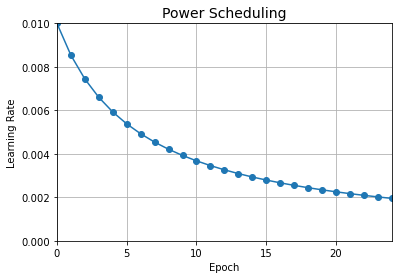

In [36]:
import math
import matplotlib.pyplot as plt

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [37]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [39]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 7s 125us/sample - loss: 0.8470 - accuracy: 0.7612 - val_loss: 0.8080 - val_accuracy: 0.7744
Epoch 2/25
55000/55000 [==============================] - 6s 106us/sample - loss: 0.6677 - accuracy: 0.7976 - val_loss: 0.5938 - val_accuracy: 0.8446
Epoch 3/25
55000/55000 [==============================] - 6s 107us/sample - loss: 0.5983 - accuracy: 0.8173 - val_loss: 0.6092 - val_accuracy: 0.8138
Epoch 4/25
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5140 - accuracy: 0.8376 - val_loss: 0.7359 - val_accuracy: 0.8188
Epoch 5/25
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4892 - accuracy: 0.8467 - val_loss: 0.5401 - val_accuracy: 0.8308
Epoch 6/25
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4494 - accuracy: 0.8564 - val_loss: 0.5037 - val_accuracy: 0.8574
Epoch 7/25
55000/55000 [===========================

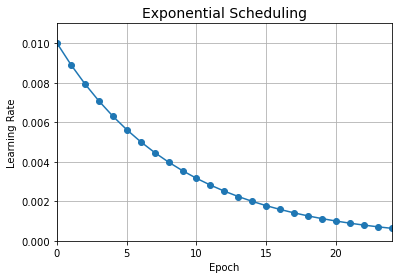

In [40]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [41]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 7s 126us/sample - loss: 1.6041 - accuracy: 0.8105 - val_loss: 0.7208 - val_accuracy: 0.8292
Epoch 2/2
55000/55000 [==============================] - 6s 111us/sample - loss: 0.7190 - accuracy: 0.8274 - val_loss: 0.7078 - val_accuracy: 0.8314


In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 8s 142us/sample - loss: 0.5782 - accuracy: 0.8021 - val_loss: 0.3729 - val_accuracy: 0.8676
Epoch 2/2
55000/55000 [==============================] - 7s 128us/sample - loss: 0.4218 - accuracy: 0.8445 - val_loss: 0.3368 - val_accuracy: 0.8730
